In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from google.colab import drive
from scipy import stats

In [4]:
# Подключаем Google Drive для доступа к файлам
drive.mount('/content/drive')

# Загрузка данных из CSV файла
data_path = '/content/drive/MyDrive/data_raw.csv'
data = pd.read_csv(data_path)

# Преобразование столбца dt в формат datetime
data['dt'] = pd.to_datetime(data['dt'])

# Создание агрегированной таблицы
funnel_data = data.groupby(['client_id', 'dt', 'event_type']).size().unstack(fill_value=0).reset_index()

# Приведение данных в формат воронки (0 или 1 для наличия события)
funnel_data['views'] = (funnel_data.get('views', 0) > 0).astype(int)
funnel_data['clicks'] = (funnel_data.get('clicks', 0) > 0).astype(int)
funnel_data['adds'] = (funnel_data.get('adds', 0) > 0).astype(int)

# Перестановка столбцов в нужном порядке
reordered_data = funnel_data[['client_id', 'dt','views', 'clicks', 'adds',]]

# Сохранение в файл
output_file = "funnel_data.csv"
reordered_data.to_csv(output_file, index=False)

print(f"Данные успешно сохранены в файл: {output_file}")

# Результат
print(reordered_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Данные успешно сохранены в файл: funnel_data.csv
event_type  client_id         dt  views  clicks  adds
0                   1 2024-06-17      1       0     0
1                   1 2024-06-19      1       0     0
2                   3 2024-06-17      1       1     0
3                   3 2024-06-18      1       1     0
4                   3 2024-06-19      1       1     1


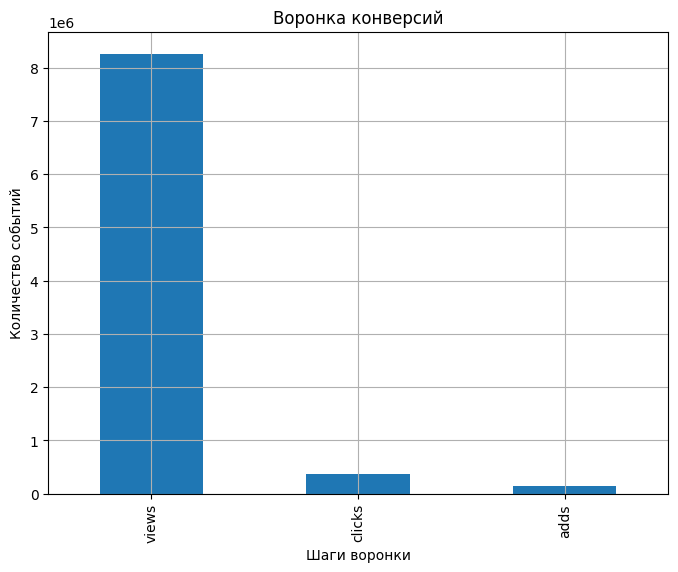

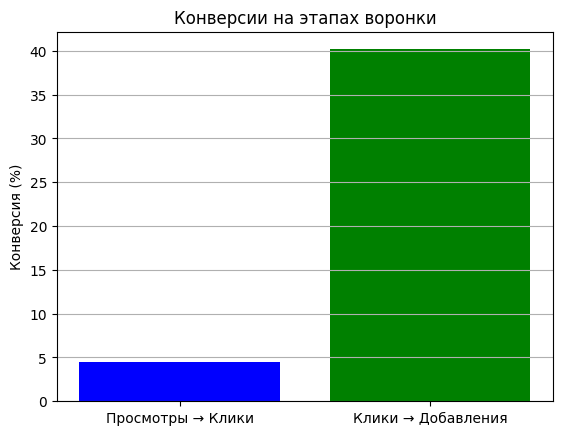

In [5]:
# Загрузка данных
funnel_data_path = 'funnel_data.csv'
funnel_data = pd.read_csv(funnel_data_path)

# Агрегация данных
funnel_steps = funnel_data[['views', 'clicks', 'adds']].sum()

# Построение воронки
funnel_steps.plot(kind='bar', figsize=(8, 6), title='Воронка конверсий')
plt.ylabel('Количество событий')
plt.xlabel('Шаги воронки')
plt.grid()
plt.show()

funnel_steps = [4.48, 40.18]
labels = ['Просмотры → Клики', 'Клики → Добавления']

plt.bar(labels, funnel_steps, color=['blue', 'green'])
plt.title('Конверсии на этапах воронки')
plt.ylabel('Конверсия (%)')
plt.grid(axis='y')
plt.show()

In [6]:
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/data_raw.csv'
data = pd.read_csv(data_path)

# Преобразование столбца даты в формат datetime
data['dt'] = pd.to_datetime(data['dt'])

# Подсчет уникальных пользователей по каждому событию
unique_views = data[data['event_type'] == 'views']['client_id'].nunique()
unique_clicks = data[data['event_type'] == 'clicks']['client_id'].nunique()
unique_adds = data[data['event_type'] == 'adds']['client_id'].nunique()

# Общий уникальный пользователь
total_users = data['client_id'].nunique()

# Расчет долей уникальных пользователей
view_ratio = unique_views / total_users if total_users > 0 else 0
click_ratio = unique_clicks / total_users if total_users > 0 else 0
add_ratio = unique_adds / total_users if total_users > 0 else 0

# Среднее количество уникальных пользователей в день
daily_users = data.groupby('dt')['client_id'].nunique().mean()
print(f"Среднее количество уникальных пользователей в день: {daily_users:.2f}")

# Ожидаемый трафик за неделю
weekly_traffic = daily_users * 7
print(f"Ожидаемый трафик за неделю: {weekly_traffic:.2f}")

# Вывод результатов
print(f"Доля уникальных пользователей с просмотром (views): {view_ratio:.2%}")
print(f"Доля уникальных пользователей с кликами (clicks): {click_ratio:.2%}")
print(f"Доля уникальных пользователей с добавлением товаров (adds): {add_ratio:.2%}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Среднее количество уникальных пользователей в день: 1655725.80
Ожидаемый трафик за неделю: 11590080.60
Доля уникальных пользователей с просмотром (views): 100.00%
Доля уникальных пользователей с кликами (clicks): 7.36%
Доля уникальных пользователей с добавлением товаров (adds): 2.91%


Описание данных:
                        dt   total_views   total_clicks    total_adds  \
count                    5  5.000000e+00       5.000000      5.000000   
mean   2024-06-19 00:00:00  1.653419e+06   74007.800000  29740.000000   
min    2024-06-17 00:00:00  1.098595e+06   37605.000000  23995.000000   
25%    2024-06-18 00:00:00  1.116608e+06   39784.000000  24019.000000   
50%    2024-06-19 00:00:00  1.828765e+06   85621.000000  25922.000000   
75%    2024-06-20 00:00:00  1.841228e+06   87159.000000  26241.000000   
max    2024-06-21 00:00:00  2.381898e+06  119870.000000  48523.000000   
std                    NaN  5.460531e+05   35027.111638  10551.730664   

            CTR        CR  
count  5.000000  5.000000  
mean   0.042868  0.455209  
min    0.034230  0.280527  
25%    0.035629  0.301070  
50%    0.046819  0.404797  
75%    0.047337  0.638080  
max    0.050325  0.651568  
std    0.007386  0.179452  


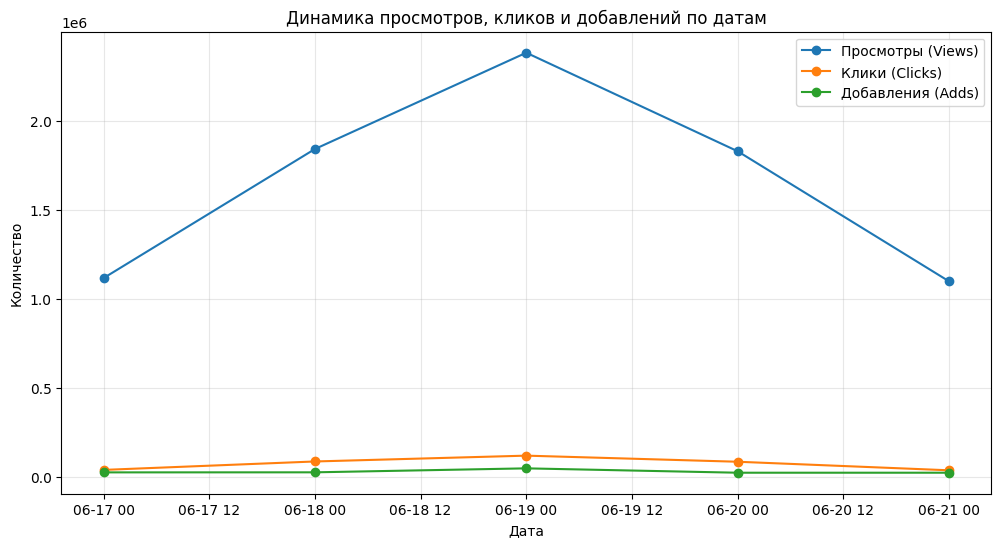

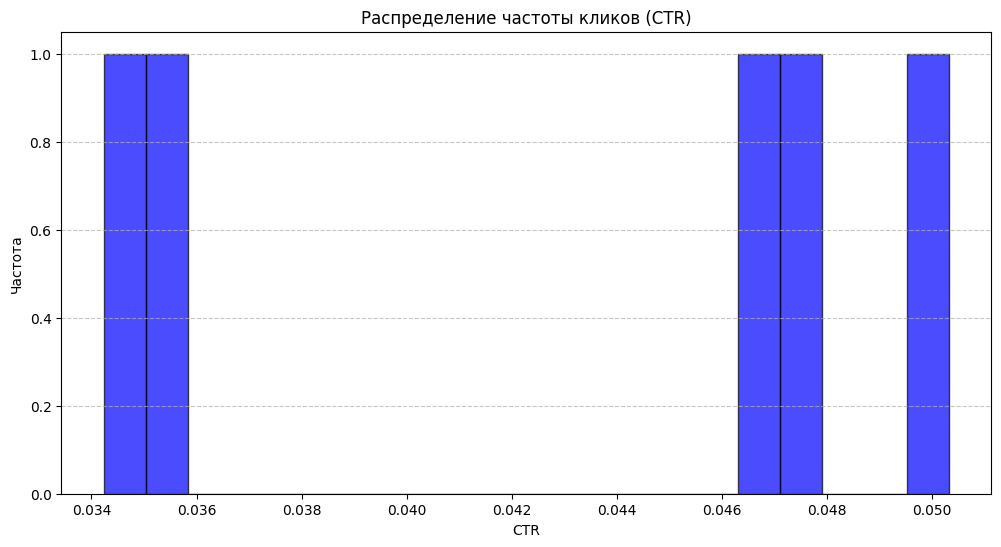

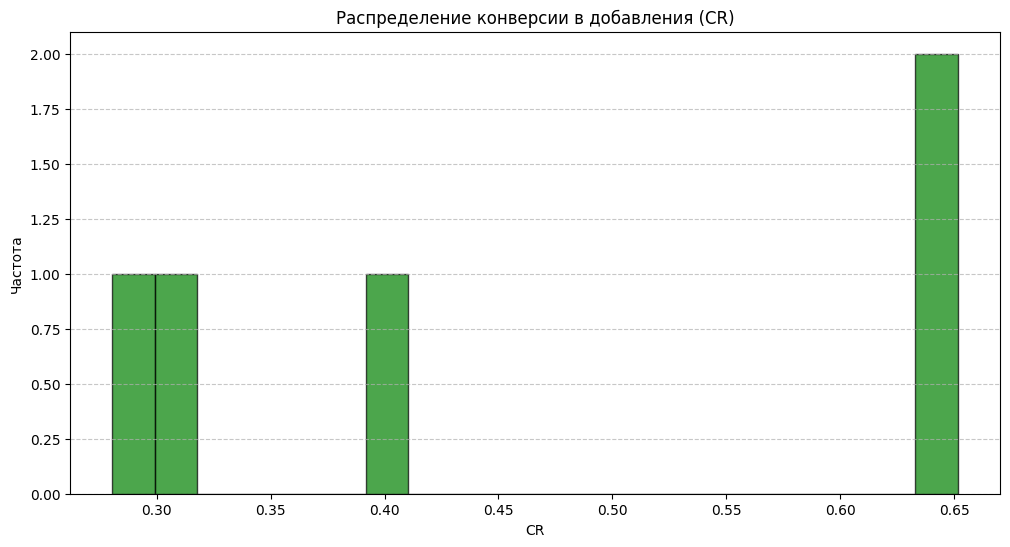

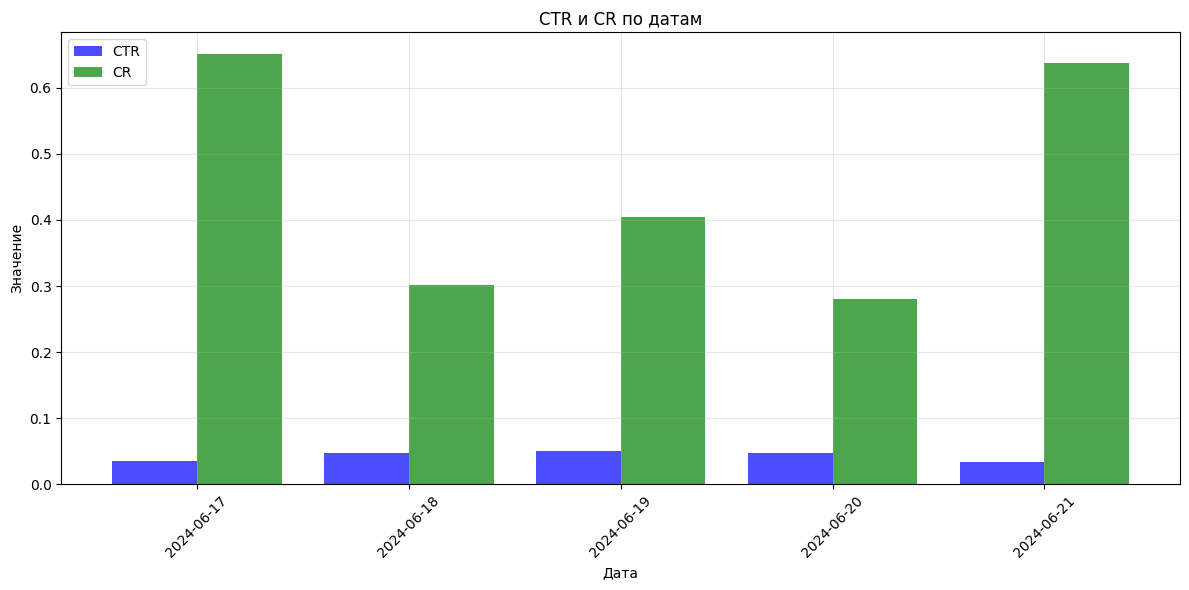

In [7]:
# Загрузка файла
data = pd.read_csv('funnel_data.csv')

# Преобразование столбца dt в формат datetime
data['dt'] = pd.to_datetime(data['dt'])

# Агрегируем данные по датам
aggregated_data = data.groupby('dt').agg(
    total_views=('views', 'sum'),
    total_clicks=('clicks', 'sum'),
    total_adds=('adds', 'sum')
).reset_index()

# Расчет ключевых метрик
aggregated_data['CTR'] = np.where(aggregated_data['total_views'] > 0,
                                  aggregated_data['total_clicks'] / aggregated_data['total_views'], 0)
aggregated_data['CR'] = np.where(aggregated_data['total_clicks'] > 0,
                                 aggregated_data['total_adds'] / aggregated_data['total_clicks'], 0)

# Вывод ключевых метрик
print("Описание данных:")
print(aggregated_data.describe())

# Визуализация 1: Линейный график просмотров, кликов и добавлений по датам
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data['dt'], aggregated_data['total_views'], label='Просмотры (Views)', marker='o')
plt.plot(aggregated_data['dt'], aggregated_data['total_clicks'], label='Клики (Clicks)', marker='o')
plt.plot(aggregated_data['dt'], aggregated_data['total_adds'], label='Добавления (Adds)', marker='o')
plt.title('Динамика просмотров, кликов и добавлений по датам')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Визуализация 2: Гистограмма распределения CTR
plt.figure(figsize=(12, 6))
plt.hist(aggregated_data['CTR'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Распределение частоты кликов (CTR)')
plt.xlabel('CTR')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Визуализация 3: Гистограмма распределения CR
plt.figure(figsize=(12, 6))
plt.hist(aggregated_data['CR'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Распределение конверсии в добавления (CR)')
plt.xlabel('CR')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Визуализация 4: Столбчатая диаграмма CTR и CR по датам
x = np.arange(len(aggregated_data['dt']))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, aggregated_data['CTR'], width=0.4, label='CTR', color='blue', alpha=0.7)
plt.bar(x + 0.2, aggregated_data['CR'], width=0.4, label='CR', color='green', alpha=0.7)
plt.xticks(x, aggregated_data['dt'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.title('CTR и CR по датам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Mounted at /content/drive
Средний CTR (в долях): 0.458560
Средний CR (в долях): 0.444306
Дисперсия CTR: 0.051529
Дисперсия CR: 0.334631
Данные сохранены в файл: /content/drive/MyDrive/aggregated_data_with_metrics.csv


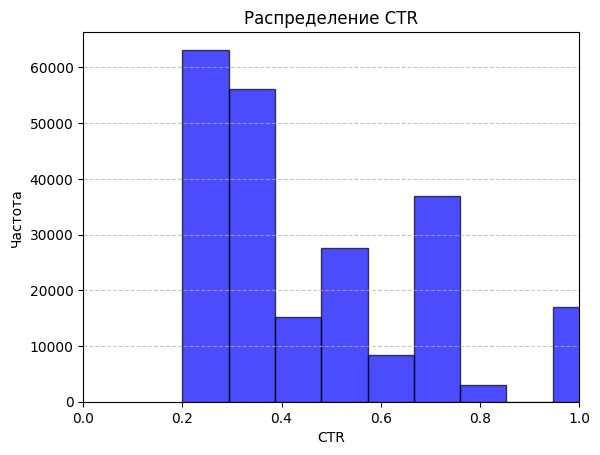

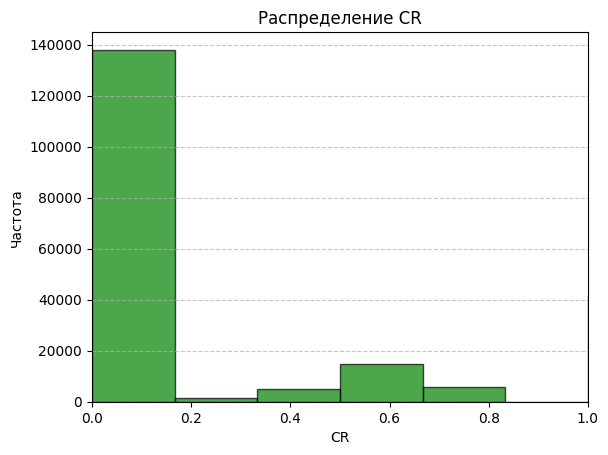

In [8]:
# Подключение Google Диска
drive.mount('/content/drive', force_remount=True)

# Укажите путь к вашему файлу
file_path = '/content/drive/MyDrive/funnel_data.csv'

# Чтение данных
data = pd.read_csv(file_path)

# Преобразование столбца dt в формат datetime
data['dt'] = pd.to_datetime(data['dt'])

# Агрегирование данных по пользователям
aggregated_data = data.groupby('client_id').agg(
    clicks=('clicks', 'sum'),
    views=('views', 'sum'),
    adds=('adds', 'sum')
).reset_index()

# Расчет CTR и CR в долях с проверкой на деление на ноль
aggregated_data['CTR'] = aggregated_data.apply(
    lambda row: row['clicks'] / row['views'] if row['views'] > 0 else 0, axis=1
)
aggregated_data['CR'] = aggregated_data.apply(
    lambda row: row['adds'] / row['clicks'] if row['clicks'] > 0 else 0, axis=1
)

# Исключаем строки, где нет данных для расчёта
aggregated_data = aggregated_data[aggregated_data['views'] > 0]  # Исключаем строки с views = 0 для CTR
aggregated_data = aggregated_data[aggregated_data['clicks'] > 0]  # Исключаем строки с clicks = 0 для CR

# Средние значения CTR и CR в долях
mean_ctr = aggregated_data['CTR'].mean()
mean_cr = aggregated_data['CR'].mean()

print(f"Средний CTR (в долях): {mean_ctr:.6f}")
print(f"Средний CR (в долях): {mean_cr:.6f}")

# Дельта-метод для расчета дисперсии ratio-метрик
def var_ratio(x, y):  # x/y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)
    cov_xy = np.cov(x, y, ddof=1)[0][1]

    # Формула дисперсии ratio-метрики
    result = var_x / mean_y**2 + var_y * mean_x**2 / mean_y**4 - 2 * mean_x * cov_xy / mean_y**3
    return result

# Расчет дисперсий для CTR и CR
ctr_variance = var_ratio(aggregated_data['clicks'], aggregated_data['views'])
cr_variance = var_ratio(aggregated_data['adds'], aggregated_data['clicks'])

print(f"Дисперсия CTR: {ctr_variance:.6f}")
print(f"Дисперсия CR: {cr_variance:.6f}")

# Сохранение результата в файл на Google Диске
output_file = '/content/drive/MyDrive/aggregated_data_with_metrics.csv'
aggregated_data.to_csv(output_file, index=False)
print(f"Данные сохранены в файл: {output_file}")

# Визуализация распределений метрик

# Распределение CTR
plt.hist(aggregated_data['CTR'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение CTR')
plt.xlabel('CTR')
plt.ylabel('Частота')
plt.xlim(0, 1)  # Ограничение оси X от 0 до 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Гистограмма для CR
plt.hist(aggregated_data['CR'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Распределение CR')
plt.xlabel('CR')
plt.ylabel('Частота')
plt.xlim(0, 1)  # Ограничение оси X от 0 до 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Таблица MDE сохранена в файл: mde_results.csv
Таблица значений MDE:
   Размер выборки  MDE (абсолютное)   MDE (%)
0          231801          0.006732  1.515175
1          278161          0.006145  1.383160
2          324522          0.005690  1.280556
3          370882          0.005322  1.197850
4          417242          0.005018  1.129345
5          463603          0.004760  1.071389


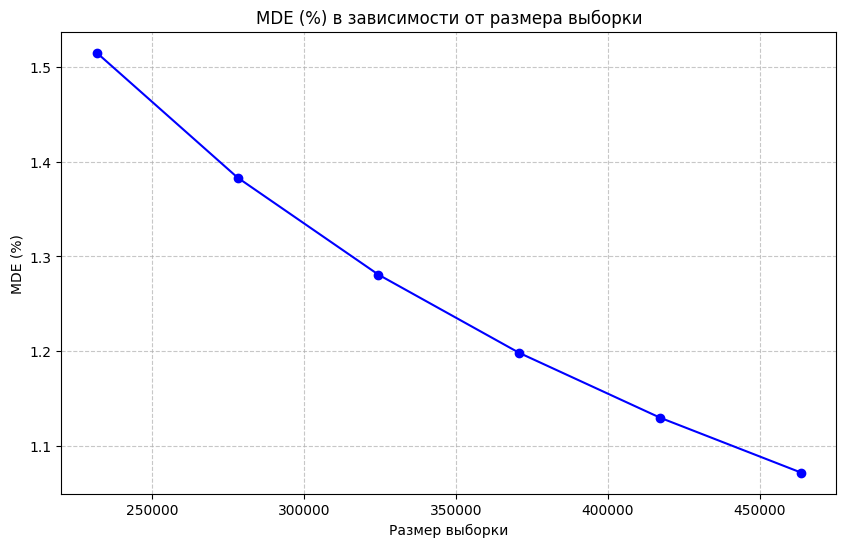

In [9]:
# Функция для расчета MDE
def get_MDE(mu, std, sample_size, n_groups=2, target_share=0.5, r=1, alpha=0.05, beta=0.2):
    """Возвращает MDE для ratio-метрики."""
    t_alpha = stats.norm.ppf(1 - (alpha / 2))
    t_beta = stats.norm.ppf(1 - beta)
    comparisons = n_groups - 1
    sample_ratio_correction = r + 2 + 1 / r
    mde = (
        np.sqrt(sample_ratio_correction)
        * (t_alpha + t_beta)
        * std
        / np.sqrt(sample_size * (1 - target_share * (comparisons - 1)))
    )
    return mde, mde * 100 / mu

# Входные данные
mu = 0.4443  # Среднее значение CR
std = np.sqrt(0.3346)  # Стандартное отклонение CR
n_groups = 2  # Контрольная и тестовая группа
target_share = 0.5  # Равное распределение
alpha = 0.05  # Уровень ошибки I рода
beta = 0.2  # Уровень ошибки II рода

# Ожидаемый недельный трафик
total_traffic = 11590080  # Общий трафик за неделю
max_traffic = total_traffic * 0.2  # Ограничение: 20% трафика

# Размеры выборки для расчета MDE
sample_sizes = [int(max_traffic * perc) for perc in np.arange(0.1, 0.21, 0.02)]

# Расчет MDE для каждого размера выборки
mde_table = []
for size in sample_sizes:
    mde, mde_percent = get_MDE(mu, std, size, n_groups=n_groups, target_share=target_share, alpha=alpha, beta=beta)
    mde_table.append({'Размер выборки': size, 'MDE (абсолютное)': mde, 'MDE (%)': mde_percent})

# Создание DataFrame
mde_df = pd.DataFrame(mde_table)

# Сохранение результатов в CSV
output_file = 'mde_results.csv'
mde_df.to_csv(output_file, index=False)
print(f"Таблица MDE сохранена в файл: {output_file}")

# Вывод таблицы
print("Таблица значений MDE:")
print(mde_df)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(mde_df['Размер выборки'], mde_df['MDE (%)'], marker='o', color='blue')
plt.title('MDE (%) в зависимости от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('MDE (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Функция для расчета MDE
def get_MDE(mu, std, sample_size, n_groups=2, target_share=0.5, r=1, alpha=0.05, beta=0.2):
    """Возвращает MDE для ratio-метрики."""
    t_alpha = stats.norm.ppf(1 - (alpha / 2))
    t_beta = stats.norm.ppf(1 - beta)
    comparisons = n_groups - 1
    sample_ratio_correction = r + 2 + 1 / r
    mde = (
        np.sqrt(sample_ratio_correction)
        * (t_alpha + t_beta)
        * std
        / np.sqrt(sample_size * (1 - target_share * (comparisons - 1)))
    )
    return mde, mde * 100 / mu

# Параметры
mu = 0.4443  # Среднее значение CR
std = np.sqrt(0.3346)  # Стандартное отклонение CR
n_groups = 2  # Контрольная и тестовая группа
target_share = 0.5  # Равное распределение между группами
alpha = 0.05  # Уровень ошибки I рода
beta = 0.2  # Уровень ошибки II рода

# Фиксация размера выборки
fixed_sample_size = 324522  # Размер выборки на одну группу
total_sample_size = fixed_sample_size * n_groups

# Расчет MDE для зафиксированного размера выборки
mde, mde_percent = get_MDE(mu, std, fixed_sample_size, n_groups=n_groups, target_share=target_share, alpha=alpha, beta=beta)

# Вывод зафиксированных параметров
print(f"Зафиксированный размер выборки (на группу): {fixed_sample_size}")
print(f"Общий размер выборки: {total_sample_size}")
print(f"Минимальный обнаруживаемый эффект (MDE): {mde:.6f}")
print(f"MDE в процентах: {mde_percent:.2f}%")

# Создание фиктивных данных для разделения на контроль и тест
# Предполагается, что у вас есть датафрейм 'data' с уникальными пользователями
# Например:
total_users = 11590080  # Общий недельный трафик
user_ids = pd.DataFrame({'user_id': range(1, total_users + 1)})

# Разделение на контрольную и тестовую группы
user_ids['group'] = np.random.choice(['control', 'test'], size=len(user_ids), p=[0.5, 0.5])

# Отбор пользователей для эксперимента
experimental_data = user_ids.sample(total_sample_size, random_state=42)
control_group = experimental_data[experimental_data['group'] == 'control'].head(fixed_sample_size)
test_group = experimental_data[experimental_data['group'] == 'test'].head(fixed_sample_size)

# Сохранение данных в файлы
control_group.to_csv('control_group.csv', index=False)
test_group.to_csv('test_group.csv', index=False)

print("Контрольная группа сохранена в файл control_group.csv")
print("Тестовая группа сохранена в файл test_group.csv")


Зафиксированный размер выборки (на группу): 324522
Общий размер выборки: 649044
Минимальный обнаруживаемый эффект (MDE): 0.005690
MDE в процентах: 1.28%
Контрольная группа сохранена в файл control_group.csv
Тестовая группа сохранена в файл test_group.csv


Результаты сохранены в файл: /content/drive/MyDrive/ab_test_results.xlsx
Сводная таблица метрик:
  ab_group  total_users  total_views  total_adds  total_orders  \
0  control       200786        43469       15799          5579   
1     test       200474        43805       16337          5881   

   total_sum_adds  total_sum_orders  users_view_ads  users_adds_ads  \
0         2462420           1589899           25389            7060   
1         2526393           1687895           25852            7085   

   users_orders_ads  ...  CR_orders       ARPU       ARPPU  view_rate  \
0              6079  ...   0.128344  12.263903  284.979208   0.126448   
1              6171  ...   0.134254  12.602098  287.008162   0.128954   

   add_to_cart_rate  order_rate  view_to_order_conversion  avg_adds_per_user  \
0          0.278073    0.239434                 23.943440           2.237819   
1          0.274060    0.238705                 23.870494           2.305857   

   avg_orders_per_user  full_

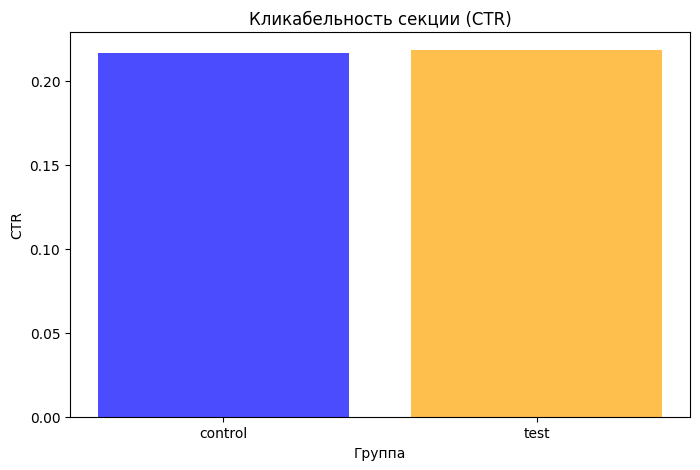

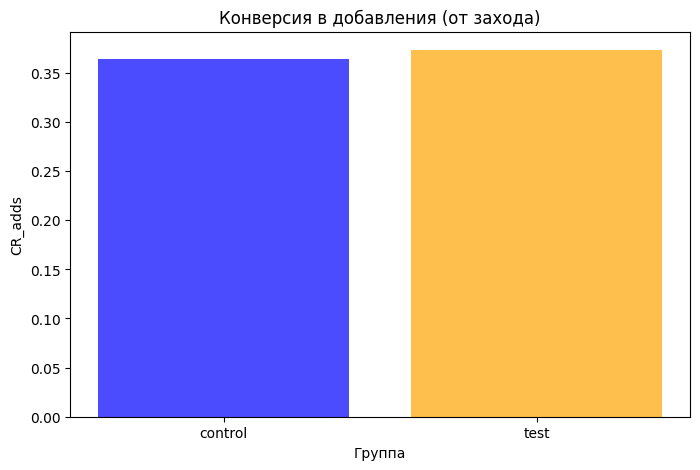

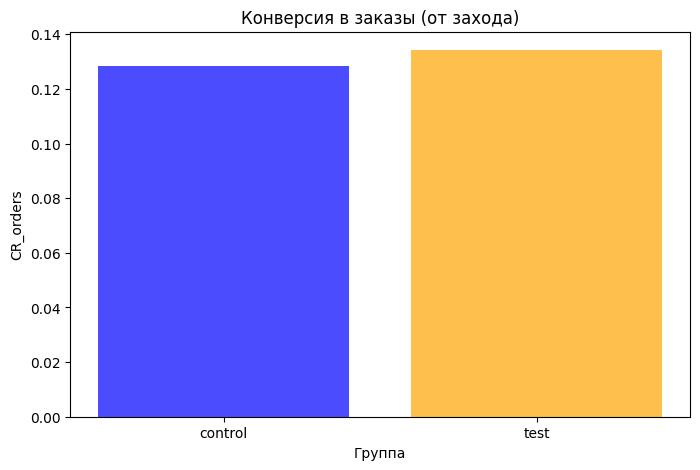

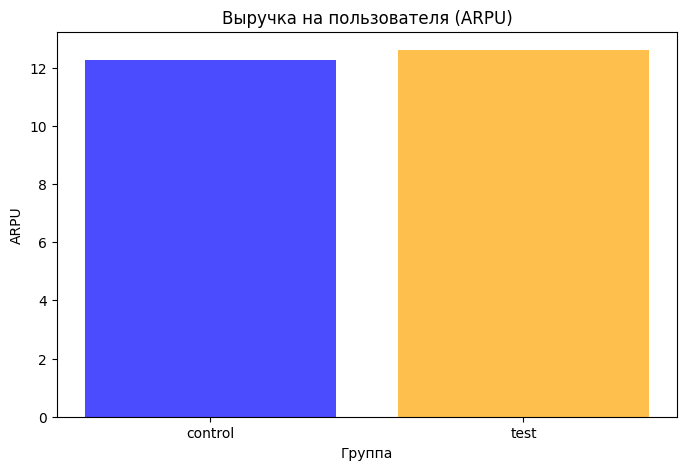

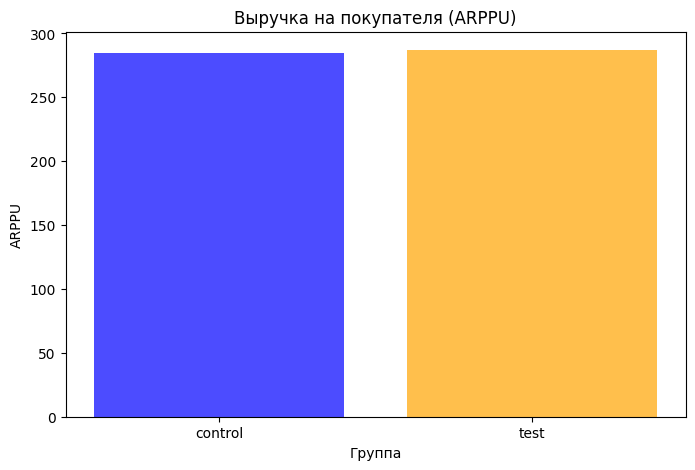

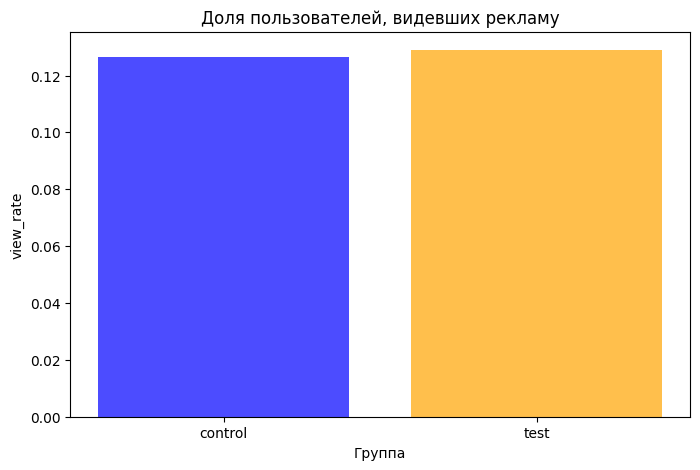

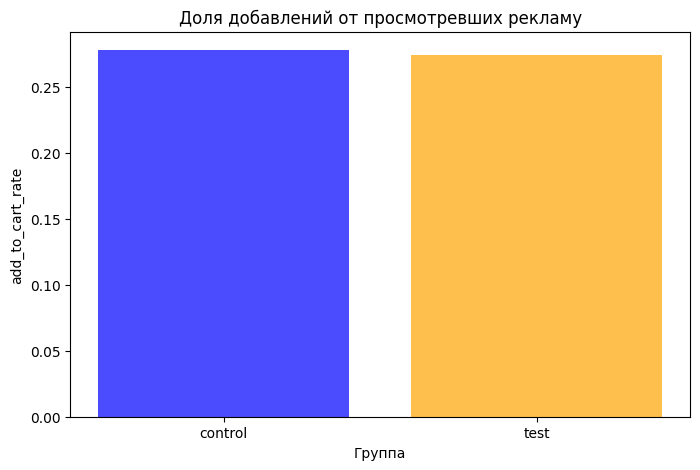

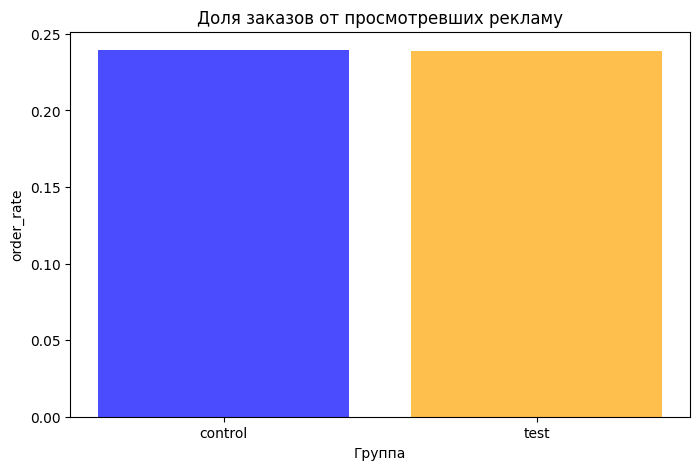

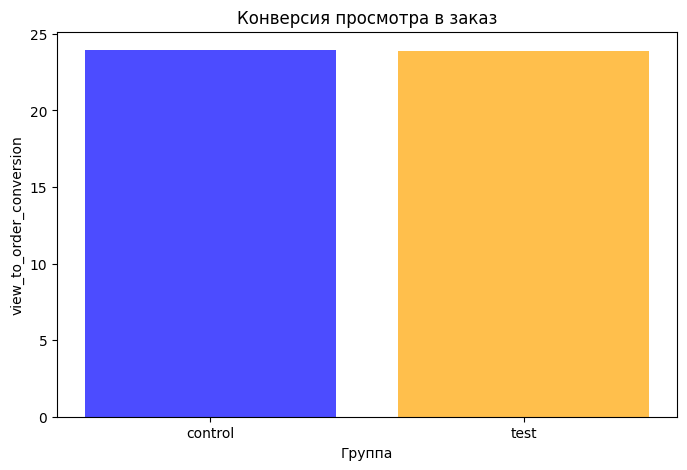

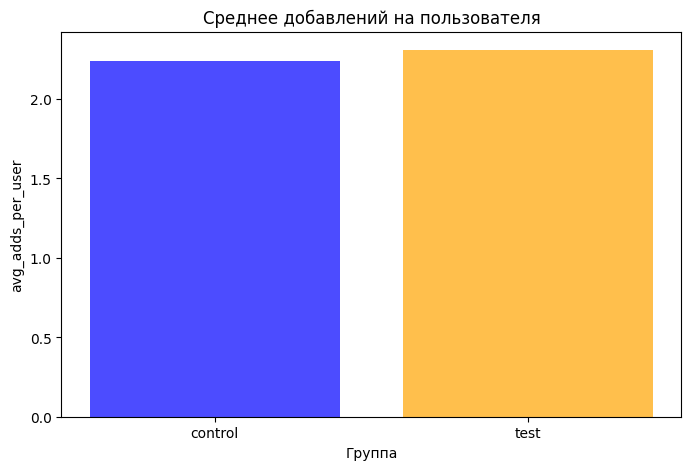

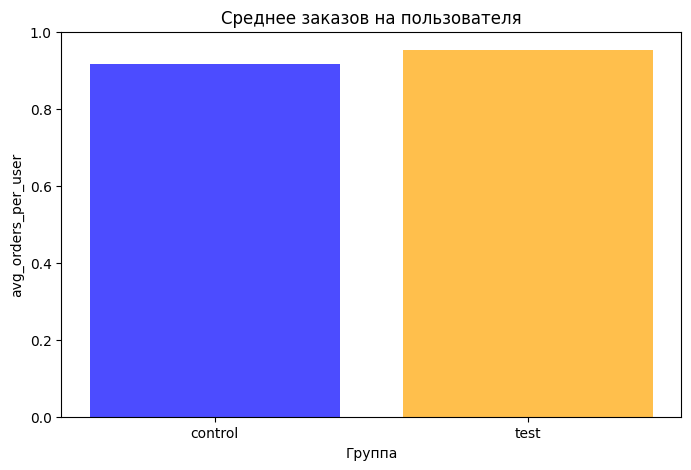

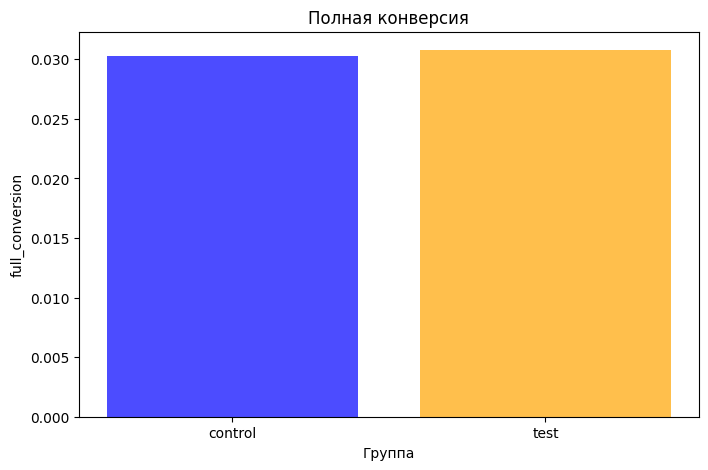

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
file_path = '/content/drive/MyDrive/final_results_to_analyze.xlsx'
df = pd.read_excel(file_path)

# Агрегация данных по группам
grouped_data = df.groupby('ab_group').agg(
    total_users=('client_id', 'nunique'),
    total_views=('cnt_view_ads', 'sum'),
    total_adds=('cnt_adds_ads', 'sum'),
    total_orders=('cnt_orders_ads', 'sum'),
    total_sum_adds=('sum_adds_ads', 'sum'),
    total_sum_orders=('sum_orders_ads', 'sum'),
    users_view_ads=('is_view_ads', 'sum'),
    users_adds_ads=('is_adds_ads', 'sum'),
    users_orders_ads=('is_orders_ads', 'sum')
).reset_index()

# Расчет основных метрик
grouped_data['CTR'] = (grouped_data['total_views'] / grouped_data['total_users'])  # Кликабельность секции
grouped_data['CR_adds'] = (grouped_data['total_adds'] / grouped_data['total_views'])  # Конверсия в добавления от захода
grouped_data['CR_orders'] = (grouped_data['total_orders'] / grouped_data['total_views'])  # Конверсия в заказы от захода
grouped_data['ARPU'] = grouped_data['total_sum_adds'] / grouped_data['total_users']  # Выручка на пользователя
grouped_data['ARPPU'] = grouped_data['total_sum_orders'] / grouped_data['total_orders']  # Выручка на покупателя

# Использование бинарных флагов для дополнительных метрик
grouped_data['view_rate'] = (grouped_data['users_view_ads'] / grouped_data['total_users'])  # Доля пользователей, видевших рекламу
grouped_data['add_to_cart_rate'] = (grouped_data['users_adds_ads'] / grouped_data['users_view_ads'])  # Доля добавлений от просмотревших рекламу
grouped_data['order_rate'] = (grouped_data['users_orders_ads'] / grouped_data['users_view_ads'])  # Доля заказов от просмотревших рекламу
grouped_data['view_to_order_conversion'] = (grouped_data['users_orders_ads'] / grouped_data['users_view_ads']) * 100  # Конверсия от просмотра до заказа
grouped_data['avg_adds_per_user'] = grouped_data['total_adds'] / grouped_data['users_adds_ads']  # Среднее добавлений на пользователя
grouped_data['avg_orders_per_user'] = grouped_data['total_orders'] / grouped_data['users_orders_ads']  # Среднее заказов на пользователя
grouped_data['full_conversion'] = (grouped_data['users_orders_ads'] / grouped_data['total_users'])  # Полная конверсия

# Проверка наличия групп "control" и "test"
if 'control' in grouped_data['ab_group'].values and 'test' in grouped_data['ab_group'].values:
    # Сравнение метрик между группами
    comparison = grouped_data.set_index('ab_group').T
    comparison['Difference'] = comparison['test'] - comparison['control']

    # Сохранение данных в файл
    output_path = '/content/drive/MyDrive/ab_test_results.xlsx'
    with pd.ExcelWriter(output_path) as writer:
        grouped_data.to_excel(writer, sheet_name='Grouped Metrics', index=False)
        comparison.to_excel(writer, sheet_name='Comparison Metrics')

    print(f"Результаты сохранены в файл: {output_path}")

# Вывод результатов
print("Сводная таблица метрик:")
print(grouped_data)

# Визуализация
metrics = [
    'CTR', 'CR_adds', 'CR_orders', 'ARPU', 'ARPPU',
    'view_rate', 'add_to_cart_rate', 'order_rate',
    'view_to_order_conversion', 'avg_adds_per_user',
    'avg_orders_per_user', 'full_conversion'
]
titles = [
    'Кликабельность секции (CTR)', 'Конверсия в добавления (от захода)', 'Конверсия в заказы (от захода)',
    'Выручка на пользователя (ARPU)', 'Выручка на покупателя (ARPPU)',
    'Доля пользователей, видевших рекламу', 'Доля добавлений от просмотревших рекламу',
    'Доля заказов от просмотревших рекламу', 'Конверсия просмотра в заказ',
    'Среднее добавлений на пользователя', 'Среднее заказов на пользователя',
    'Полная конверсия'
]

# Построение графиков для каждой метрики
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 5))
    plt.bar(grouped_data['ab_group'], grouped_data[metric], alpha=0.7, color=['blue', 'orange'])
    plt.title(titles[i])
    plt.ylabel(metric)
    plt.xlabel('Группа')
    plt.xticks(rotation=0)
    plt.show()

In [6]:
# Добавим сегментацию активности
df['activity_level'] = pd.cut(
    df['cnt_view_ads'],
    bins=[0, 1, 5, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Анализ активности по группам
activity_analysis = df.groupby(['ab_group', 'activity_level']).agg(
    total_users=('client_id', 'nunique'),
    total_views=('cnt_view_ads', 'sum'),
    total_adds=('cnt_adds_ads', 'sum'),
    total_orders=('cnt_orders_ads', 'sum'),
    total_revenue=('sum_orders_ads', 'sum')
).reset_index()

print(activity_analysis)


  ab_group activity_level  total_users  total_views  total_adds  total_orders  \
0  control            Low        12972        15147        6148          1563   
1  control         Medium         8126        24419        8789          3763   
2  control           High          466         3903         862           253   
3     test            Low        13161        15489        6240          1649   
4     test         Medium         8316        24820        9154          3899   
5     test           High          436         3496         943           333   

   total_revenue  
0         475294  
1        1028812  
2          85793  
3         508426  
4        1076184  
5         103285  


<ipython-input-6-ae2b38a3482c>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_analysis = df.groupby(['ab_group', 'activity_level']).agg(


In [8]:
# Количество пользователей с повторными просмотрами
repeat_analysis = df.groupby('ab_group').agg(
    repeat_users=('client_id', lambda x: (df['cnt_view_ads'] > 1).sum()),
    avg_views_per_user=('cnt_view_ads', 'mean')
).reset_index()

print(repeat_analysis)


  ab_group  repeat_users  avg_views_per_user
0  control         20605            0.088738
1     test         20605            0.089098


In [9]:
# Когорты по дате первого взаимодействия
df['first_interaction_date'] = df.groupby('client_id')['date'].transform('min')

cohort_analysis = df.groupby(['ab_group', 'first_interaction_date']).agg(
    cohort_users=('client_id', 'nunique'),
    cohort_revenue=('sum_orders_ads', 'sum'),
    cohort_orders=('cnt_orders_ads', 'sum')
).reset_index()

# Вычисление ARPU по когортам
cohort_analysis['cohort_ARPU'] = cohort_analysis['cohort_revenue'] / cohort_analysis['cohort_users']

print(cohort_analysis)


   ab_group first_interaction_date  cohort_users  cohort_revenue  \
0   control             2024-07-24         68308          755675   
1   control             2024-07-25         37960          356529   
2   control             2024-07-26         32376          194887   
3   control             2024-07-27         19473          116817   
4   control             2024-07-28         18098           80463   
5   control             2024-07-29         13949           48181   
6   control             2024-07-30         10622           37347   
7      test             2024-07-24         68544          862502   
8      test             2024-07-25         37725          349263   
9      test             2024-07-26         32552          186946   
10     test             2024-07-27         19280          104750   
11     test             2024-07-28         18017           88938   
12     test             2024-07-29         13677           53188   
13     test             2024-07-30         10679

In [10]:
# Разделение на новых и старых пользователей
df['is_new_user'] = df.groupby('client_id')['date'].transform('min') == df['date']

new_old_analysis = df.groupby(['ab_group', 'is_new_user']).agg(
    total_users=('client_id', 'nunique'),
    total_revenue=('sum_orders_ads', 'sum'),
    total_orders=('cnt_orders_ads', 'sum')
).reset_index()

print(new_old_analysis)


  ab_group  is_new_user  total_users  total_revenue  total_orders
0  control        False       122655         965969          3406
1  control         True       198382         623930          2173
2     test        False       122916        1028699          3579
3     test         True       198011         659196          2302


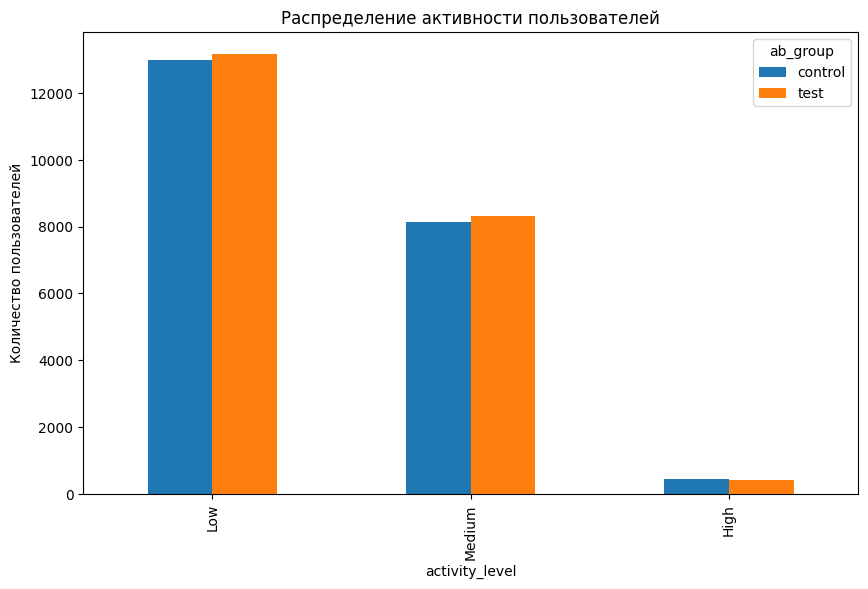

In [11]:
# Визуализация активности
activity_analysis.pivot(index='activity_level', columns='ab_group', values='total_users').plot(kind='bar', figsize=(10, 6))
plt.title('Распределение активности пользователей')
plt.ylabel('Количество пользователей')
plt.show()
